In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

# Read the Data set

In [14]:
BNK = pd.read_csv("bank-full.csv",delimiter=';')
BNK.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
BNK.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [16]:
BNK.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Correletion

In [17]:
BNK.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [18]:
BNK.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [19]:
BNK

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


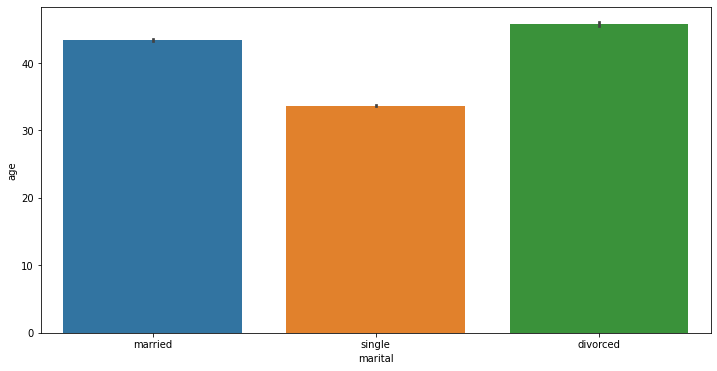

In [20]:
f, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='marital',y='age' , data=BNK);

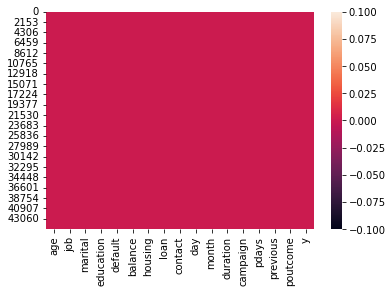

In [21]:
sns.heatmap(BNK.isnull())
plt.show()

<AxesSubplot:xlabel='job', ylabel='age'>

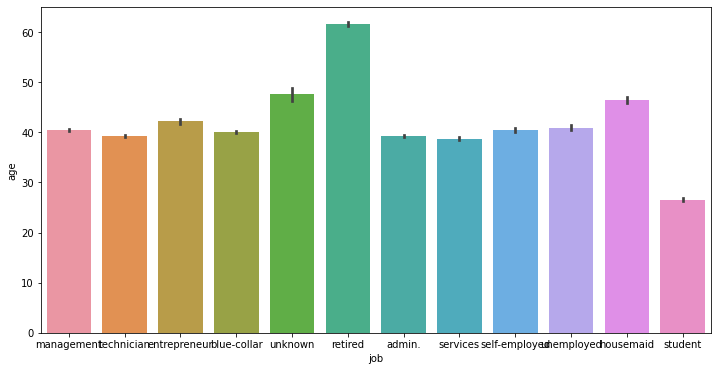

In [22]:
f, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='job',y='age' , data=BNK)

In [23]:
BNK.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [34]:
BNK_num=BNK.select_dtypes(['int64','float64'])
BNK_cat=BNK.select_dtypes(object)

In [35]:
BNK_new=pd.concat([BNK_num,BNK_cat],axis=1)
BNK_new.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,44,29,5,151,1,-1,0,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,33,2,5,76,1,-1,0,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,47,1506,5,92,1,-1,0,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,33,1,5,198,1,-1,0,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [36]:
BNK.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [37]:
BNK_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


# To convert categorical type data into numeric type.
# Use Label Encoder

In [38]:
from sklearn.preprocessing import LabelEncoder
for col in BNK_cat:
    # create an object of LabelEncoder
    le=LabelEncoder()
    BNK_cat[col]=le.fit_transform(BNK_cat[col])
    

In [39]:
BNK_cat.dtypes

job          int32
marital      int32
education    int32
default      int32
housing      int32
loan         int32
contact      int32
month        int32
poutcome     int32
y            int32
dtype: object

In [41]:
#After applying LabelEncoder we concatenate df_cat and df_num.
BNK_new=pd.concat([BNK_num,BNK_cat],axis=1)
BNK_new.head(10)

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0
5,35,231,5,139,1,-1,0,4,1,2,0,1,0,2,8,3,0
6,28,447,5,217,1,-1,0,4,2,2,0,1,1,2,8,3,0
7,42,2,5,380,1,-1,0,2,0,2,1,1,0,2,8,3,0
8,58,121,5,50,1,-1,0,5,1,0,0,1,0,2,8,3,0
9,43,593,5,55,1,-1,0,9,2,1,0,1,0,2,8,3,0


In [44]:
BNK['y'].unique()

array(['no', 'yes'], dtype=object)

In [45]:
BNK['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# Split dataset in input and output

In [46]:
X=BNK_new.iloc[:,0:16]
Y=BNK_new['y']

In [47]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3


In [48]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

# Model building

In [117]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(class_weight={0:0.3,1:0.7})
LR.fit(X,Y)

LogisticRegression(class_weight={0: 0.3, 1: 0.7})

In [118]:
LR.coef_

array([[-1.60062312e-02,  3.71384607e-05, -5.43815735e-03,
         3.43213764e-03, -2.25718883e-01, -9.19632348e-04,
         1.18968169e-01,  6.84297614e-03, -5.38710181e-02,
         3.00112829e-03, -3.96917915e-03, -1.40764354e-01,
        -4.15493511e-02, -1.57183822e-01, -1.11920895e-01,
        -1.25084673e-01]])

In [119]:
LR.predict_proba(X)

array([[0.88060818, 0.11939182],
       [0.90489333, 0.09510667],
       [0.91456883, 0.08543117],
       ...,
       [0.36045793, 0.63954207],
       [0.85435248, 0.14564752],
       [0.46693605, 0.53306395]])

In [120]:
y_pred = LR.predict(X)
BNK_new["y_pred"] = y_pred
BNK_new 

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y,y_pred
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3,1,1
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3,1,0
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2,1,1
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3,0,0


In [121]:
y_prob = pd.DataFrame(BNK.predict_proba(X.iloc[:,:]))
new_df = pd.concat([BNK_new,y_prob],axis=1)
new_df  

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y,y_pred,0,1
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0,0,0.948535,0.051465
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0,0,0.948887,0.051113
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0,0,0.946964,0.053036
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0,0,0.960857,0.039143
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0,0,0.903443,0.096557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3,1,1,0.615590,0.384410
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3,1,0,0.920174,0.079826
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2,1,1,0.672074,0.327926
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3,0,0,0.940348,0.059652


In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix) 

[[38114  1808]
 [ 3553  1736]]


In [123]:
pd.crosstab(y_pred,Y)  

y,0,1
row_0,,
0,38114,3553
1,1808,1736


In [124]:
#type(y_pred)
accuracy = sum(Y==y_pred)/BNK_new.shape[0]
accuracy 

0.881422662626352

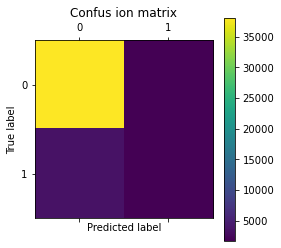

In [125]:
# Show confusion matrix in a separate window
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix)
plt.title('Confus ion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [126]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))  

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     39922
           1       0.49      0.33      0.39      5289

    accuracy                           0.88     45211
   macro avg       0.70      0.64      0.66     45211
weighted avg       0.87      0.88      0.87     45211



In [127]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,BNK.predict(X))
Logit_roc_score  

0.5723967867991099

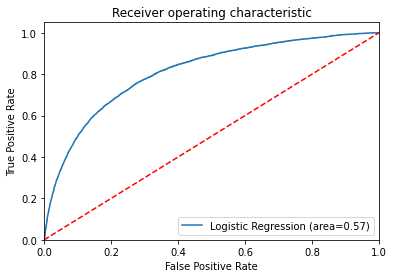

In [128]:
fpr, tpr, thresholds = roc_curve(Y,BNK.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

In [129]:
y_prob1 = pd.DataFrame(BNK.predict_proba(X)[:,1]) 

In [130]:
import statsmodels.api as sm  
logit = sm.Logit(Y, X)   
logit.fit().summary()  

Optimization terminated successfully.
         Current function value: 0.276364
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Mon, 26 Sep 2022   Pseudo R-squ.:                  0.2342
Time:                        10:43:58   Log-Likelihood:                -12495.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0235      0.001    -18.322      0.000      -0.026      -0.021
balance     1.978e-05   4.51e-06      4.381      0.000    1.09e-05    2.86e-05
day           -0.0169      0.002     -8.524      0.000      -0.021      -0.013
duration       0.0038   6.01e-05     63.105      0.000       0.004       0.004
campaign      -0.1682      0.011    -15.928      0.000      -0.189      -0.147
pdays          0.0002      0.000      0.878      0.380      -0.000       0.001
previous       0.0548      0.008      6.879      0.000       0.039       0.070
job           -0.0157      0.005     -3.051      0.002      -0.026      -0.006
marital       -0.1877      0.026     -7.181      0.000      -0.239      -0.136
education      0.0308      0.022      1.389      0.165      -0.013       0.074
default       -0.4022      0.159     -2.534      0.011      -0.713      -0.091
housing       -1.2719      0.037    -34.810      0.000      -1.343      -1.200
loan          -0.8290      0.056    -14.696      0.000      -0.940      -0.718
contact       -0.5961      0.027    -22.449      0.000      -0.648      -0.544
month          0.0054      0.005      1.013      0.311      -0.005       0.016
poutcome      -0.2257      0.022    -10.244      0.000      -0.269      -0.183
==============================================================================
"""

In [131]:
import statsmodels.api as smf
LG = smf.Logit(Y,X).fit()
LG.summary()

Optimization terminated successfully.
         Current function value: 0.276364
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Mon, 26 Sep 2022   Pseudo R-squ.:                  0.2342
Time:                        10:43:59   Log-Likelihood:                -12495.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0235      0.001    -18.322      0.000      -0.026      -0.021
balance     1.978e-05   4.51e-06      4.381      0.000    1.09e-05    2.86e-05
day           -0.0169      0.002     -8.524      0.000      -0.021      -0.013
duration       0.0038   6.01e-05     63.105      0.000       0.004       0.004
campaign      -0.1682      0.011    -15.928      0.000      -0.189      -0.147
pdays          0.0002      0.000      0.878      0.380      -0.000       0.001
previous       0.0548      0.008      6.879      0.000       0.039       0.070
job           -0.0157      0.005     -3.051      0.002      -0.026      -0.006
marital       -0.1877      0.026     -7.181      0.000      -0.239      -0.136
education      0.0308      0.022      1.389      0.165      -0.013       0.074
default       -0.4022      0.159     -2.534      0.011      -0.713      -0.091
housing       -1.2719      0.037    -34.810      0.000      -1.343      -1.200
loan          -0.8290      0.056    -14.696      0.000      -0.940      -0.718
contact       -0.5961      0.027    -22.449      0.000      -0.648      -0.544
month          0.0054      0.005      1.013      0.311      -0.005       0.016
poutcome      -0.2257      0.022    -10.244      0.000      -0.269      -0.183
==============================================================================
"""

In [132]:
fpr

array([0.00000000e+00, 2.50488452e-05, 1.00195381e-04, ...,
       9.97795702e-01, 9.97795702e-01, 1.00000000e+00])

In [133]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [134]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(BNK.predict_proba(X)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(Y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls  

,thresholds,accuracy
814,4.848037e-01,0.887793
815,4.847453e-01,0.887771
813,4.848240e-01,0.887771
811,4.852870e-01,0.887771
816,4.844080e-01,0.887749
...,...,...
7776,4.630133e-04,0.122824
7777,4.614753e-04,0.122802
7778,5.660869e-05,0.118931
7779,5.458392e-05,0.118909


In [135]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh)) 

Best Threshold=0.118086


In [138]:
threshold = 0.118086
preds = np.where(BNK.predict_proba(X)[:,1] > threshold, 1, 0)
print(classification_report(Y,preds))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     39922
           1       0.27      0.76      0.39      5289

    accuracy                           0.73     45211
   macro avg       0.61      0.74      0.61     45211
weighted avg       0.88      0.73      0.77     45211



# Confussion matrics

In [139]:
pd.crosstab(Y,preds)

col_0,0,1
y,,
0,28905,11017
1,1288,4001
